# 1D GAN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def function(x):
  return x * x * x

In [3]:
x = tf.range(-0.5, 0.6 , 0.1)

In [4]:
y = function(x)

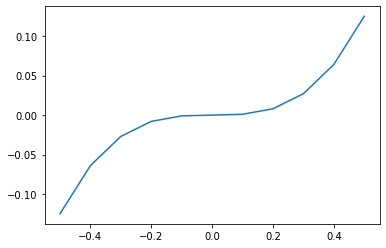

In [5]:
plt.plot(x, y)
plt.show()

In [6]:
def generate_samples(n_samples):
  X = tf.random.uniform((n_samples,1), minval=-0.5, maxval=0.5)
  Y = tf.ones((n_samples,1))

  X2 = function(X)
  X_comb = tf.concat([X,X2], axis=1)
  return X_comb, Y

In [7]:
X, Y = generate_samples(100)

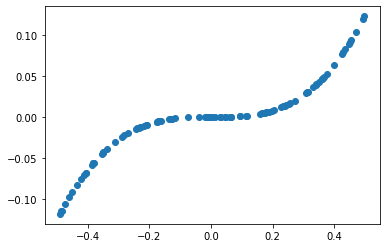

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Discriminative Model

In [9]:
def discriminative_model(n_input):
  layers = [
    tf.keras.Input(shape=(n_input,)),
    tf.keras.layers.Dense(25, activation='relu', 
                          kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ]
  model = tf.keras.Sequential(layers)
  model.compile(loss='binary_crossentropy', 
                optimizer='adam', metrics=['accuracy'])
  return model

In [10]:
dm = discriminative_model(2)
dm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [11]:
def generator_model(latent_size, n_output):
  layers = [
    tf.keras.layers.Dense(15, activation='relu', 
                          kernel_initializer='he_uniform',
                          input_dim=latent_size),
    tf.keras.layers.Dense(n_output, activation='linear')
  ]
  model = tf.keras.Sequential(layers)
  return model

In [12]:
gm = generator_model(5,2)
gm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                90        
                                                                 
 dense_3 (Dense)             (None, 2)                 32        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [13]:
def gan_model(d_model, g_model):
  d_model.trainable = False
  gan = tf.keras.Sequential()
  gan.add(g_model)
  gan.add(d_model)

  gan.compile(loss='binary_crossentropy', optimizer='adam')
  return gan

In [14]:
g = gan_model(dm, gm)
g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 2)                 122       
                                                                 
 sequential (Sequential)     (None, 1)                 101       
                                                                 
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


In [15]:
def generator_samples(g_model, latent_size, n):
  samples = tf.random.normal((n, latent_size))
  x = g_model.predict(samples)
  y = tf.zeros((n ,1))
  return x, y

In [16]:
generator_samples(gm, 5, 10)

(array([[ 0.16699392,  1.0325828 ],
        [ 0.37814897,  0.29374716],
        [-0.5614034 ,  0.3255634 ],
        [ 0.20810205,  1.5522492 ],
        [ 0.9054177 ,  0.23359999],
        [-1.238869  ,  1.4298558 ],
        [ 0.1256721 ,  1.234662  ],
        [-3.7011793 ,  1.1681242 ],
        [-1.1674285 ,  1.725054  ],
        [ 0.25148734, -0.8996239 ]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32)>)

In [19]:
def train_gan(gan_model, d_model, g_model, latent_size, batch_size, n_epochs):
  half_size = int(batch_size/2)

  for i in range(n_epochs):

    X_real, y_real = generate_samples(half_size)
    X_fake, y_fake = generator_samples(g_model, latent_size, half_size)

    d_model.train_on_batch(X_real, y_real)
    d_model.train_on_batch(X_fake, y_fake)

    X_gan = tf.random.normal((batch_size, latent_size))
    y_gan = tf.ones((batch_size, 1))

    gan_model.train_on_batch(X_gan, y_gan)

    if (i+1) % 1000 == 0:
      _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
      _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
      print("iteration:{} acc real:{} acc fake:{}".format(i, acc_real, 
                                                          acc_fake))
      plt.scatter(X_real[:, 0], X_real[:, 1], color='red')
      plt.scatter(X_fake[:, 0], X_fake[:, 1], color='blue')
      plt.show()

iteration:999 acc real:0.453125 acc fake:0.3125


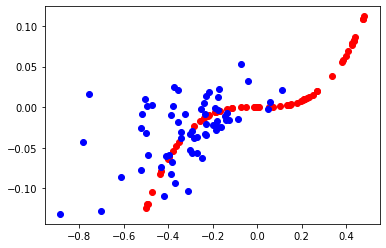

iteration:1999 acc real:0.71875 acc fake:0.890625


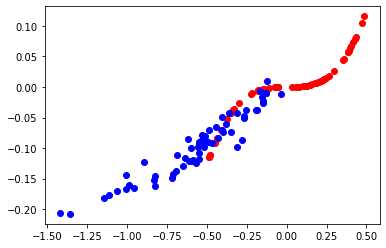

iteration:2999 acc real:0.4375 acc fake:0.078125


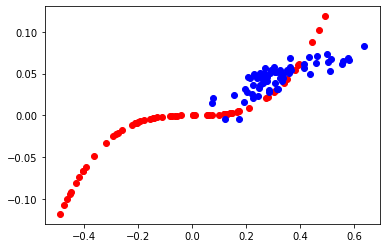

iteration:3999 acc real:0.671875 acc fake:0.28125


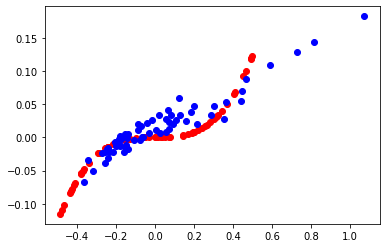

iteration:4999 acc real:0.53125 acc fake:0.546875


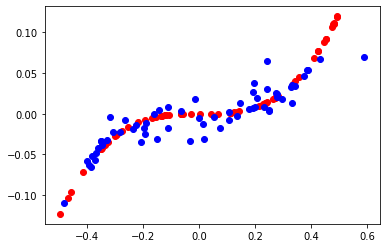

iteration:5999 acc real:0.15625 acc fake:0.921875


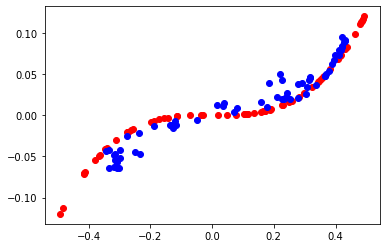

iteration:6999 acc real:0.25 acc fake:0.71875


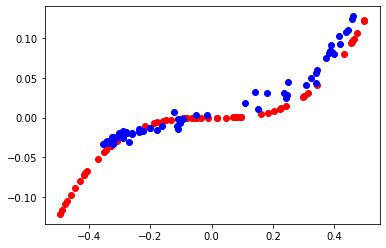

iteration:7999 acc real:0.625 acc fake:0.28125


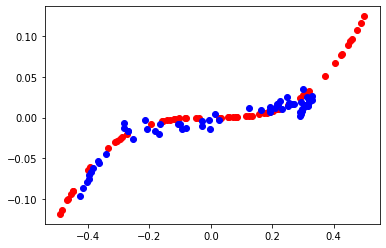

iteration:8999 acc real:0.59375 acc fake:0.515625


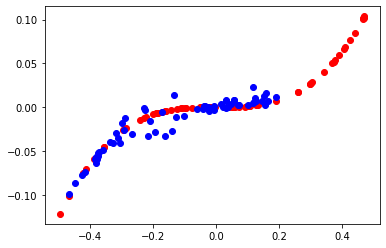

iteration:9999 acc real:0.078125 acc fake:1.0


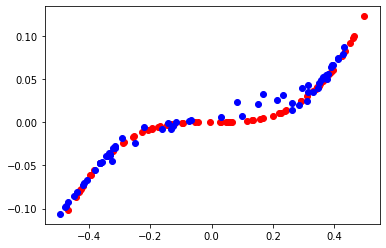

In [20]:
d = discriminative_model(2)
g = generator_model(5, 2)

gan = gan_model(d, g)

train_gan(gan, d, g, 5, 128, 10000)